In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
init_notebook_mode(connected=True) 

In [4]:
from datetime import date
from datetime import timedelta

today = date.today()
yesterday = today - timedelta(days=1)
yesterday = yesterday.strftime('%d-%m-%Y')

In [5]:
# downloading the data from the previous day because the data from the current one might not be available yet
import requests
try:
    for filename in ['csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
                    'csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
                    'csse_covid_19_time_series/time_series_covid19_recovered_global.csv',
                    f'csse_covid_19_daily_reports/{yesterday}.csv',
                    f'csse_covid_19_daily_reports_us/{yesterday}.csv']:
        print(f'Downloading {filename}')
        url = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/{filename}'
        myfile = requests.get(url)
        full_path = os.path.join('data/',filename)
        #open(filename.split('/')[1],'wb').write(myfile.content)
        open(full_path,'wb').write(myfile.content)
except:
    print('Could not update data, older data will be used instead')


# Daily report 27-07-2020 for the whole world

In [6]:
world_total = pd.read_csv(f'data/csse_covid_19_daily_reports/{yesterday}.csv')

# Field description

    FIPS: US only. Federal Information Processing Standards code that uniquely identifies counties within the USA.
    Admin2: County name. US only.
    
    Province_State: Province, state or dependency name.
    
    Country_Region: Country, region or sovereignty name. The names of locations included on the Website correspond with the official designations used by the U.S. Department of State.
    
    Last Update: MM/DD/YYYY HH:mm:ss (24 hour format, in UTC).
    
    Lat and Long_: Dot locations on the dashboard. All points (except for Australia) shown on the map are based on geographic centroids, and are not representative of a specific address, building or any location at a spatial scale finer than a province/state. Australian dots are located at the centroid of the largest city in each state.
    
    Confirmed: Counts include confirmed and probable (where reported).
    
    
    Deaths: Counts include confirmed and probable (where reported).
    Recovered: Recovered cases are estimates based on local media reports, and state and local reporting when available, and therefore may be substantially lower than the true number. US state-level recovered cases are from COVID Tracking Project.
    
    Active: Active cases = total cases - total recovered - total deaths.
    
    Incidence_Rate: Incidence Rate = cases per 100,000 persons.
    
    Case-Fatality Ratio (%): Case-Fatality Ratio (%) = Number recorded deaths / Number cases.


In [7]:
world_total.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-08-09 04:34:54,34.223334,-82.461707,325,8,0,317.0,"Abbeville, South Carolina, US",1325.070331,2.461538
1,22001.0,Acadia,Louisiana,US,2020-08-09 04:34:54,30.295065,-92.414197,2570,79,0,2491.0,"Acadia, Louisiana, US",4142.154888,3.073930
2,51001.0,Accomack,Virginia,US,2020-08-09 04:34:54,37.767072,-75.632346,1095,16,0,1079.0,"Accomack, Virginia, US",3388.414408,1.461187
3,16001.0,Ada,Idaho,US,2020-08-09 04:34:54,43.452658,-116.241552,8932,81,0,8851.0,"Ada, Idaho, US",1854.701227,0.906852
4,19001.0,Adair,Iowa,US,2020-08-09 04:34:54,41.330756,-94.471059,29,0,0,29.0,"Adair, Iowa, US",405.480984,0.000000


In [8]:
world_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3940 entries, 0 to 3939
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3244 non-null   float64
 1   Admin2               3249 non-null   object 
 2   Province_State       3772 non-null   object 
 3   Country_Region       3940 non-null   object 
 4   Last_Update          3940 non-null   object 
 5   Lat                  3862 non-null   float64
 6   Long_                3862 non-null   float64
 7   Confirmed            3940 non-null   int64  
 8   Deaths               3940 non-null   int64  
 9   Recovered            3940 non-null   int64  
 10  Active               3936 non-null   float64
 11  Combined_Key         3940 non-null   object 
 12  Incidence_Rate       3862 non-null   float64
 13  Case-Fatality_Ratio  3887 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 431.1+ KB


In [9]:
# clean up the data 
# make world choropleth map (maybe also in separate continents)
# possibly try to make an animated map changing over time (probably from the time series file)

# Sum of all cases for all the countries

In [10]:
# data for choropleth world map
world_sum = world_total[['Country_Region','Confirmed','Deaths','Recovered','Active']]
world_sum = world_sum.groupby('Country_Region').sum()
world_sum['Case-Fatality_Ratio'] = round((world_sum['Deaths']/world_sum['Confirmed'])*100,2)

In [11]:
world_sum.head()

,Confirmed,Deaths,Recovered,Active,Case-Fatality_Ratio
Country_Region,,,,,
Afghanistan,37054,1312,25960,9782.0,3.54
Albania,6275,193,3268,2814.0,3.08
Algeria,34693,1293,24083,9317.0,3.73
Andorra,955,52,839,64.0,5.45
Angola,1572,70,564,938.0,4.45


# Total sum of confirmed cases, deaths, recoveries and active cases

In [12]:
total_sum = world_total[['Confirmed','Deaths','Recovered','Active']].sum()
print(total_sum)

Confirmed    19637506.0
Deaths         726781.0
Recovered    11939109.0
Active        6170408.0
dtype: float64


In [13]:
# top 10 for confirmed cases
top10 = world_sum.sort_values('Confirmed',ascending=False).head(10)
countries = top10.index

In [14]:
# utility function for extracting the data for the hotspot countries
def process_time_series(time_series):
    time_series.drop(['Province/State','Lat','Long'], axis=1, inplace=True)
    top10 = time_series[time_series['Country/Region'].isin(countries)].groupby('Country/Region').sum()
    top10.sort_index(inplace=True)
    return top10

# Time series data for all countries

In [15]:
ts_confirmed = pd.read_csv('data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
ts_deaths = pd.read_csv('data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
ts_recovered = pd.read_csv('data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

top10_confirmed = process_time_series(ts_confirmed)
top10_deaths = process_time_series(ts_deaths)
top10_recovered = process_time_series(ts_recovered)

In [16]:
ts_confirmed.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054
1,Albania,0,0,0,0,0,0,0,0,0,...,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275
2,Algeria,0,0,0,0,0,0,0,0,0,...,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693
3,Andorra,0,0,0,0,0,0,0,0,0,...,922,925,925,925,937,939,939,944,955,955
4,Angola,0,0,0,0,0,0,0,0,0,...,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572


# Worldwide Confirmed cases, deaths and recoveries over time

In [17]:
# Time series sum of cases from all the countries
confirmed = ts_confirmed.drop('Country/Region',axis=1).sum()
confirmed.index = pd.to_datetime(confirmed.index)

deaths = ts_deaths.drop('Country/Region',axis=1).sum()
deaths.index = pd.to_datetime(deaths.index)
  
recovered = ts_recovered.drop('Country/Region',axis=1).sum()
recovered.index = pd.to_datetime(recovered.index)
    
concatenated = pd.concat([confirmed,recovered,deaths],axis=1)
concatenated.columns = ['Confirmed','Recovered','Deaths']

In [18]:
@ticker.FuncFormatter
def major_formatter(x,pos):
    return '%1.1fM' % (x*1e-6)

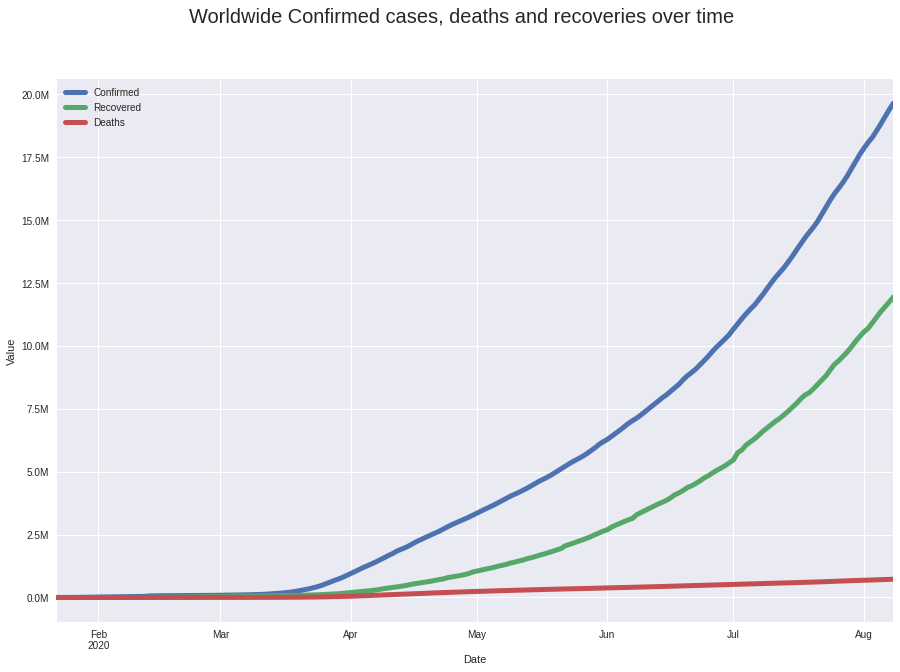

In [19]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(15,10))
plt.suptitle('Worldwide Confirmed cases, deaths and recoveries over time', fontsize=20)

ax = fig.add_subplot()
concatenated.plot(linewidth=5, ax=ax)
plt.xlabel('Date')
plt.ylabel('Value')
ax.yaxis.set_major_formatter(major_formatter)

In [20]:
@ticker.FuncFormatter
def major_formatter(x,pos):
    if x >= 1e6:
        return '%1.0fM' % (x*1e-6)
    elif x >= 1e4:
        return '%1.0fk' % (x*1e-3)
    else:
        return '%1.0f' % (x)

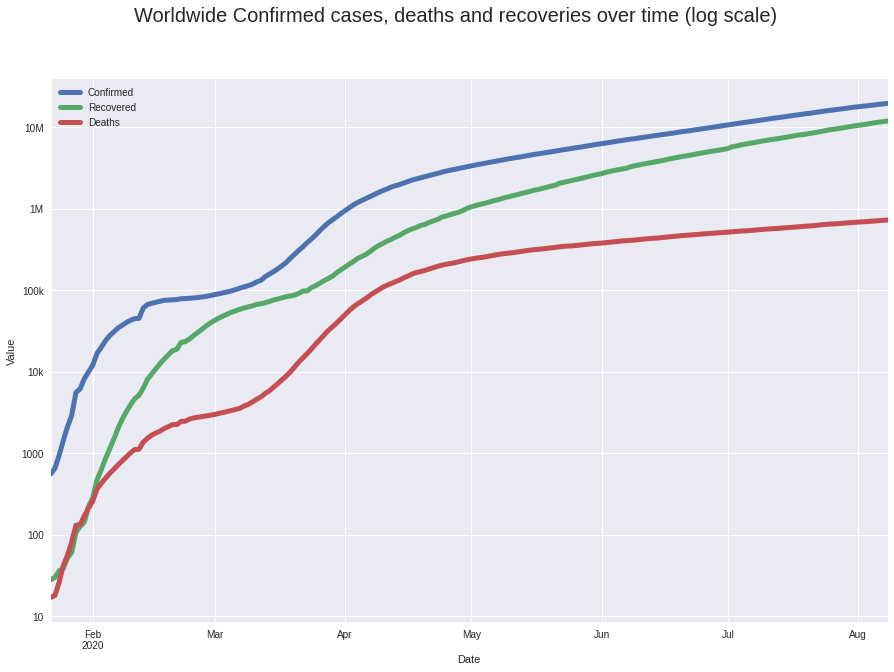

In [21]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(15,10))
plt.suptitle('Worldwide Confirmed cases, deaths and recoveries over time (log scale)', fontsize=20)

ax = fig.add_subplot()
concatenated.plot(linewidth=5, ax=ax)
plt.xlabel('Date')
plt.ylabel('Value')
plt.yscale('log')
ax.yaxis.set_major_formatter(major_formatter)

In [22]:
# utility function for creating a dataframe for graphing for a specified country
def extract_country_data(name,ts_confirmed,ts_deaths,ts_recovered):
    
    confirmed = pd.DataFrame(ts_confirmed.loc[name])
    confirmed.index = pd.to_datetime(confirmed.index)
    confirmed.columns = ['Confirmed']
    
    deaths = pd.DataFrame(ts_deaths.loc[name])
    deaths.index = pd.to_datetime(deaths.index)
    deaths.columns = ['Deaths']
    
    recovered = pd.DataFrame(ts_recovered.loc[name])
    recovered.index = pd.to_datetime(recovered.index)
    recovered.columns = ['Recovered']
    
    concatenated = pd.concat([confirmed,recovered,deaths],axis=1)
    return concatenated

In [23]:
# appending the dataframes for each hotspot country into a list
top10_total_data = []

for country in countries:
    top10_total_data.append((country,extract_country_data(country,top10_confirmed,top10_deaths,top10_recovered)))

# Area plots of confirmed cases, deaths and recoveries for 10 hotspot countries

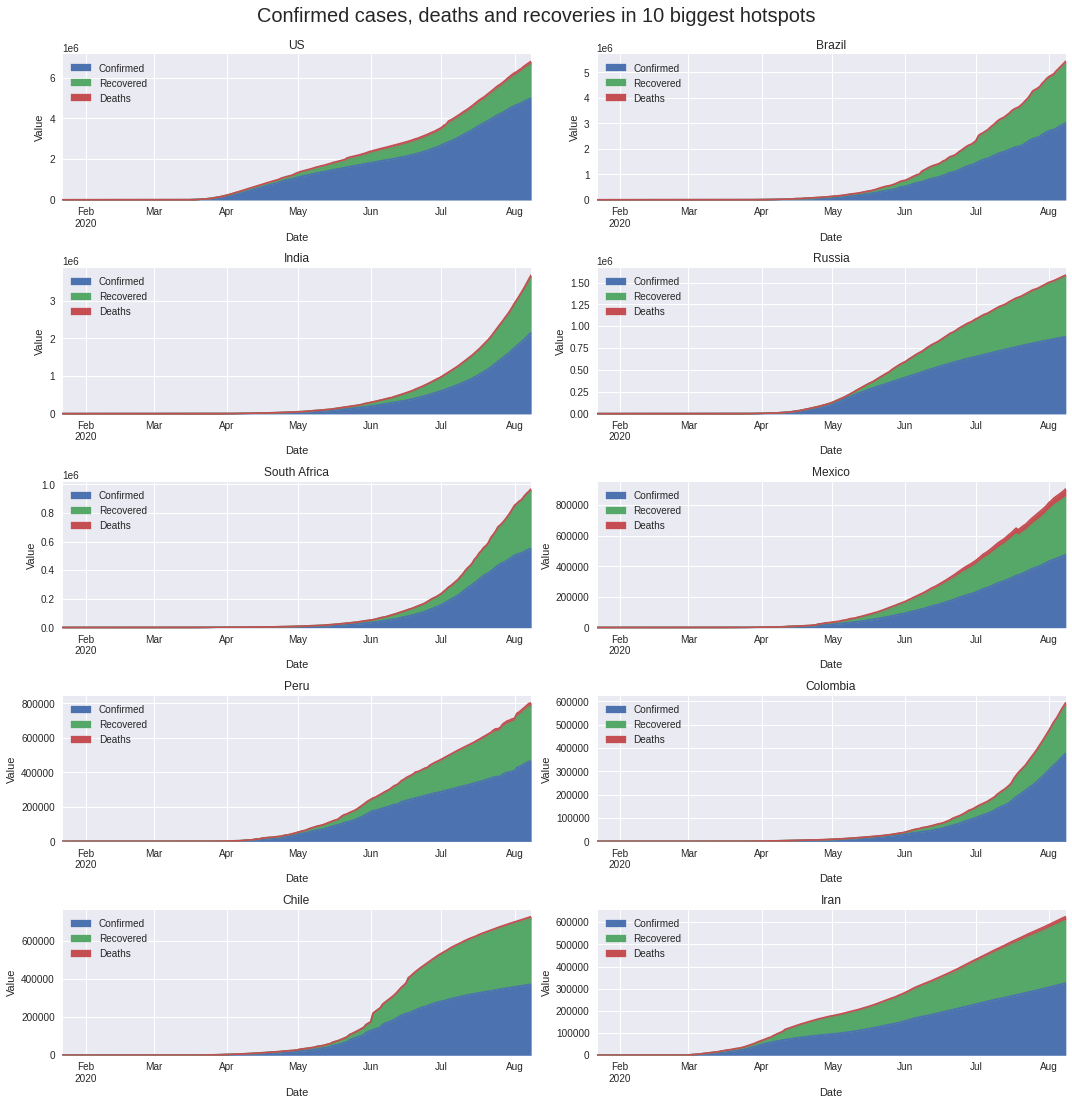

In [24]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(15,15))
plt.suptitle('Confirmed cases, deaths and recoveries in 10 biggest hotspots', fontsize=20,y=1.02)

for i in range(0,10):
    ax = fig.add_subplot(5,2,i+1)
    plt.title(top10_total_data[i][0])
    plt.xlabel('Date')
    plt.ylabel('Value')
    top10_total_data[i][1].plot(kind='area',ax=ax)
    
plt.tight_layout()

# Barplots of confirmed cases, deaths, recoveries and active cases for 10 hotspot countries

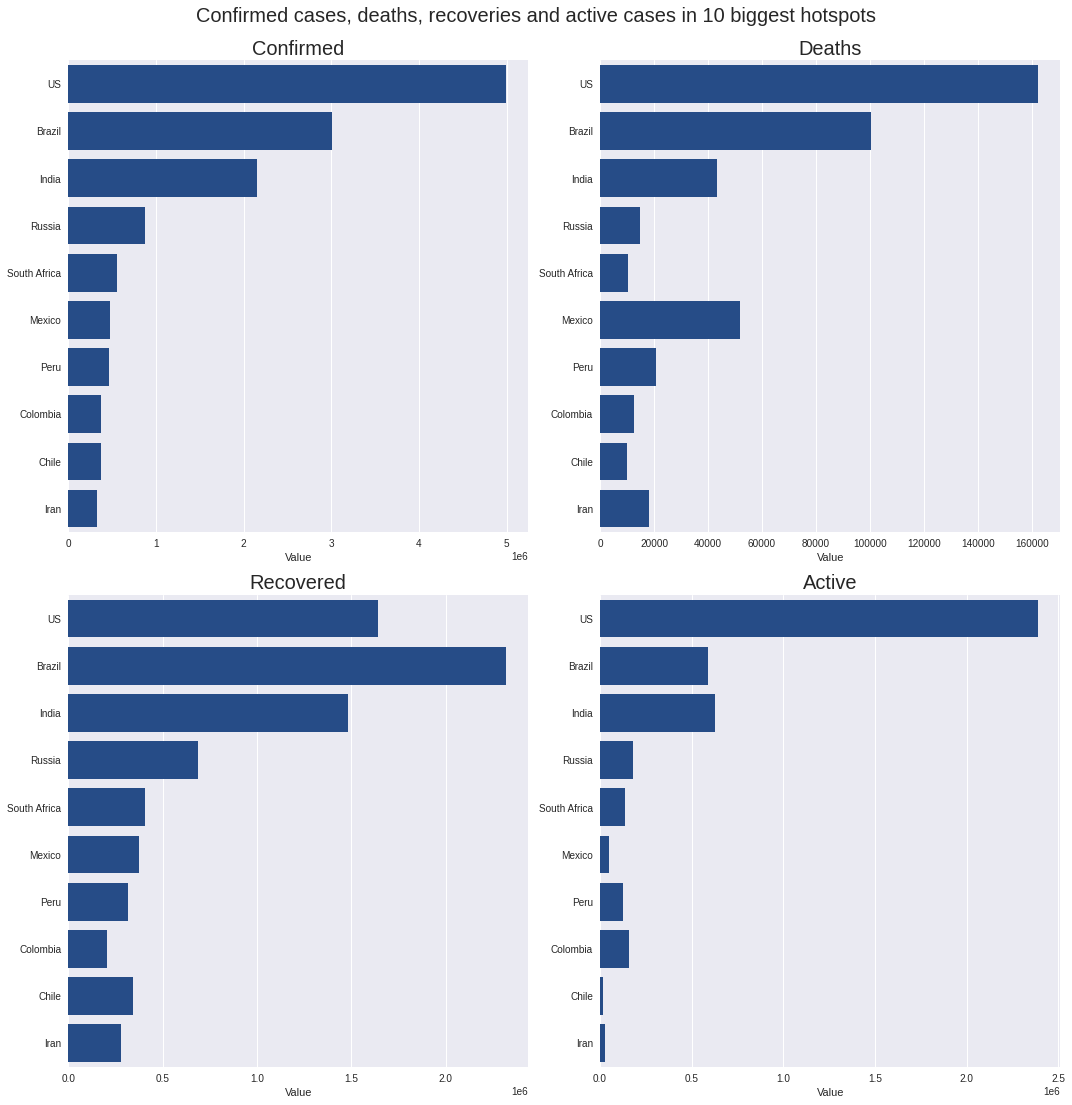

In [25]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(15,15))
plt.suptitle('Confirmed cases, deaths, recoveries and active cases in 10 biggest hotspots', fontsize=20,y=1.02)
columns = top10.columns

for i in range(0,4):
    ax = fig.add_subplot(2,2,i+1)
    sns.barplot(x=columns[i], y=top10.index,data=top10, color='#164897')
    plt.title(columns[i],fontsize=20)
    plt.ylabel('')
    plt.xlabel('Value') 
    
plt.tight_layout()

# Choropleth map of the case fatality ratio worldwide

In [26]:
data = dict(type = 'choropleth',
            locations = world_sum.index,
            locationmode = 'country names',
            colorscale= 'reds',
            text= world_sum['Confirmed'],
            z=world_sum['Case-Fatality_Ratio'],
            colorbar = {'title':'Confirmed cases per 100k around the world'})

In [27]:
layout = dict(geo = {'scope':'world'})

In [28]:
choromap = go.Figure(data = [data],layout = layout)

In [29]:
# map of the case fatality ratio (%)

In [30]:
iplot(choromap)

# Choropleth map of confirmed cases in Europe

In [31]:
europe = ['Portugal','Spain','Iceland','Ireland','United Kingdom','France','Belgium','Netherlands','Italy',
          'Germany','Switzerland','Austria','Denmark','Norway','Sweden','Finland','Russia','Estonia','Latvia',
         'Lithuania','Poland','Belarus','Czechia','Ukraine','Moldova','Romania','SLovakia','Hungary','Slovenia',
         'Croatia','Bosnia and Herzegovina','Montenegro','Albania','Serbia','Bulgaria','North Macedonia','Greece']

In [32]:
europe_sum = world_total[['Country_Region','Confirmed','Deaths','Recovered','Active']]

In [33]:
europe_sum = europe_sum[europe_sum['Country_Region'].isin(europe)].groupby('Country_Region').sum()

In [34]:
europe_sum.head()

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Albania,6275,193,3268,2814.0
Austria,21919,721,19812,1386.0
Belarus,68738,585,64744,3409.0
Belgium,73401,9870,17766,45765.0
Bosnia and Herzegovina,13687,394,7373,5920.0


In [35]:
data = dict(type = 'choropleth',
            locations = europe_sum.index,
            locationmode = 'country names',
            colorscale= 'reds',
            text= europe_sum['Confirmed'],
            z=europe_sum['Confirmed'],
            colorbar = {'title':'Confirmed cases per 100k in Europe'})

In [36]:
layout = dict(geo = {'scope':'europe'})

In [37]:
choromap = go.Figure(data = [data],layout = layout)

In [38]:
iplot(choromap)


# Daily report 27-07-2020 for the United States

In [39]:
USA_total = pd.read_csv(f'data/csse_covid_19_daily_reports_us/{yesterday}.csv')

# Field description

    Province_State - The name of the State within the USA.
    
    Country_Region - The name of the Country (US).
    
    Last_Update - The most recent date the file was pushed.
    
    Lat - Latitude.
    
    Long_ - Longitude.
    
    Confirmed - Aggregated case count for the state.
    
    Deaths - Aggregated death toll for the state.
    
    Recovered - Aggregated Recovered case count for the state.
    
    Active - Aggregated confirmed cases that have not been resolved (Active cases = total cases - total recovered - total deaths).
    
    FIPS - Federal Information Processing Standards code that uniquely identifies counties within the USA.
    
    Incident_Rate - cases per 100,000 persons.
    
    People_Tested - Total number of people who have been tested.
    
    People_Hospitalized - Total number of people hospitalized.
    
    Mortality_Rate - Number recorded deaths * 100/ Number confirmed cases.
    
    UID - Unique Identifier for each row entry.
    
    
    ISO3 - Officialy assigned country code identifiers.
    
    Testing_Rate - Total test results per 100,000 persons. The "total test results" are equal to "Total test results (Positive + Negative)" from COVID Tracking Project.
    
    Hospitalization_Rate - US Hospitalization Rate (%): = Total number hospitalized / Number cases. The "Total number hospitalized" is the "Hospitalized – Cumulative" count from COVID Tracking Project. The "hospitalization rate" and "Total number hospitalized" is only presented for those states which provide cumulative hospital data.


In [40]:
# adding the abbreviated state names because they are required by the plotly choropleth map
state_abbrev = pd.read_csv('data/state_abbrev.csv')

In [41]:
state_abbrev.head(5)

,Province_State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,American Samoa,Samoa,AS
3,Arizona,Ariz.,AZ
4,Arkansas,Ark.,AR


In [42]:
# dropping cruise ships diamond princess and grand princess
USA_only = USA_total.drop([9,13]).reset_index()

In [43]:
USA_only = pd.concat([USA_only.set_index('Province_State'),state_abbrev.set_index('Province_State')['Code']],axis=1, join='inner').reset_index()

In [44]:
USA_only.head()

,Province_State,index,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Code
0,Alabama,0,US,2020-08-09 04:35:07,32.3182,-86.9023,100173,1755,37923.0,60495.0,1,2043.018976,749502.0,11537.0,1.751969,84000001,USA,15286.023269,11.517075,AL
1,Alaska,1,US,2020-08-09 04:35:07,61.3707,-152.4044,3613,26,1254.0,2333.0,2,493.886227,273593.0,NaN,0.719624,84000002,USA,37399.339754,NaN,AK
2,American Samoa,2,US,2020-08-09 04:35:07,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,1396.0,NaN,NaN,16,ASM,2508.941248,NaN,AS
3,Arizona,3,US,2020-08-09 04:35:07,33.7298,-111.4312,186107,4137,25163.0,156807.0,4,2556.865448,1016521.0,19244.0,2.222915,84000004,USA,13965.661806,10.340288,AZ
4,Arkansas,4,US,2020-08-09 04:35:07,34.9697,-92.3731,48811,535,40360.0,7916.0,5,1617.434399,551523.0,3223.0,1.096064,84000005,USA,18275.640167,6.603020,AR


In [45]:
data = dict(type = 'choropleth',
            locations = USA_only['Code'],
            locationmode = 'USA-states',
            colorscale= 'reds',
            text= USA_only['FIPS'],
            z=USA_only['Confirmed'],
            colorbar = {'title':'Confirmed cases'})

In [46]:
layout = dict(geo = {'scope':'usa'})

In [47]:
choromap = go.Figure(data = [data],layout = layout)

In [48]:
iplot(choromap)